In [2]:
import pandas as pd
import glob as  g
import missingno as msno
import seaborn as sns

In [3]:
help(g)

Help on module glob:

NAME
    glob - Filename globbing utility.

FUNCTIONS
    escape(pathname)
        Escape all special characters.
    
    glob(pathname, *, recursive=False)
        Return a list of paths matching a pathname pattern.
        
        The pattern may contain simple shell-style wildcards a la
        fnmatch. However, unlike fnmatch, filenames starting with a
        dot are special cases that are not matched by '*' and '?'
        patterns.
        
        If recursive is true, the pattern '**' will match any files and
        zero or more directories and subdirectories.
    
    iglob(pathname, *, recursive=False)
        Return an iterator which yields the paths matching a pathname pattern.
        
        The pattern may contain simple shell-style wildcards a la
        fnmatch. However, unlike fnmatch, filenames starting with a
        dot are special cases that are not matched by '*' and '?'
        patterns.
        
        If recursive is true, the patte

In [4]:
files = g.glob('../data/*.csv')

In [5]:
files

['../data/February 2019.csv',
 '../data/2008.csv',
 '../data/2009.csv',
 '../data/2018.csv',
 '../data/2001.csv',
 '../data/2015.csv',
 '../data/April 2019.csv',
 '../data/January 2019.csv',
 '../data/2014.csv',
 '../data/2000.csv',
 '../data/March 2019.csv',
 '../data/2016.csv',
 '../data/2002.csv',
 '../data/2003.csv',
 '../data/2017.csv',
 '../data/May 2019.csv',
 '../data/2013.csv',
 '../data/2007.csv',
 '../data/2006.csv',
 '../data/2012.csv',
 '../data/2004.csv',
 '../data/2010.csv',
 '../data/August 2019.csv',
 '../data/2011.csv',
 '../data/2005.csv',
 '../data/1999.csv',
 '../data/July 2019.csv',
 '../data/June 2019.csv']

In [6]:
df = pd.read_csv(files[0], names = ['symbol', 'date', 'open', 'high', 'low', 'close', 'volume'])

In [7]:
columns = ['symbol', 'date', 'open', 'high', 'low', 'close', 'volume']
df_all = pd.DataFrame(columns = columns)

In [8]:
files = g.glob('../data/*.csv')
columns = ['symbol', 'date', 'open', 'high', 'low', 'close', 'volume']
df_all = pd.DataFrame(columns = columns)
i = 0
for file in files:
    i += 1
    df = pd.read_csv(file, names = ['symbol', 'date', 'open', 'high', 'low', 'close', 'volume'])
    df_all = pd.concat([df_all, df])
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [9]:
df_all.head()

,symbol,date,open,high,low,close,volume
0,00DS30,03-02-2019,2007.96,2010.03,1996.52,2003.84,9.84212e+07
1,00DS30,04-02-2019,2003.84,2023.21,2003.84,2018.20,8.89052e+07
2,00DS30,05-02-2019,2018.20,2024.17,2010.43,2021.23,7.06664e+07
3,00DS30,06-02-2019,2021.23,2027.78,2014.37,2022.58,7.66848e+07
4,00DS30,07-02-2019,2022.58,2037.42,2022.05,2026.09,7.72978e+07


In [10]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995836 entries, 0 to 6038
Data columns (total 7 columns):
symbol    995836 non-null object
date      995836 non-null object
open      995836 non-null float64
high      995836 non-null float64
low       995836 non-null object
close     995836 non-null float64
volume    995835 non-null object
dtypes: float64(3), object(4)
memory usage: 60.8+ MB


In [11]:
df_all = df_all.set_index(pd.to_datetime(df_all['date'], format = "%d-%m-%Y"))

In [12]:
df_all.head()

,symbol,date,open,high,low,close,volume
date,,,,,,,
2019-02-03,00DS30,03-02-2019,2007.96,2010.03,1996.52,2003.84,9.84212e+07
2019-02-04,00DS30,04-02-2019,2003.84,2023.21,2003.84,2018.20,8.89052e+07
2019-02-05,00DS30,05-02-2019,2018.20,2024.17,2010.43,2021.23,7.06664e+07
2019-02-06,00DS30,06-02-2019,2021.23,2027.78,2014.37,2022.58,7.66848e+07
2019-02-07,00DS30,07-02-2019,2022.58,2037.42,2022.05,2026.09,7.72978e+07


In [13]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 995836 entries, 2019-02-03 to 2019-06-30
Data columns (total 7 columns):
symbol    995836 non-null object
date      995836 non-null object
open      995836 non-null float64
high      995836 non-null float64
low       995836 non-null object
close     995836 non-null float64
volume    995835 non-null object
dtypes: float64(3), object(4)
memory usage: 60.8+ MB


In [14]:
df_dse30 = df_all[df_all['symbol'] == "00DSEGEN"]

In [15]:
df_dse30.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1513 entries, 2008-01-01 to 2011-12-29
Data columns (total 7 columns):
symbol    1513 non-null object
date      1513 non-null object
open      1513 non-null float64
high      1513 non-null float64
low       1513 non-null object
close     1513 non-null float64
volume    1513 non-null object
dtypes: float64(3), object(4)
memory usage: 94.6+ KB


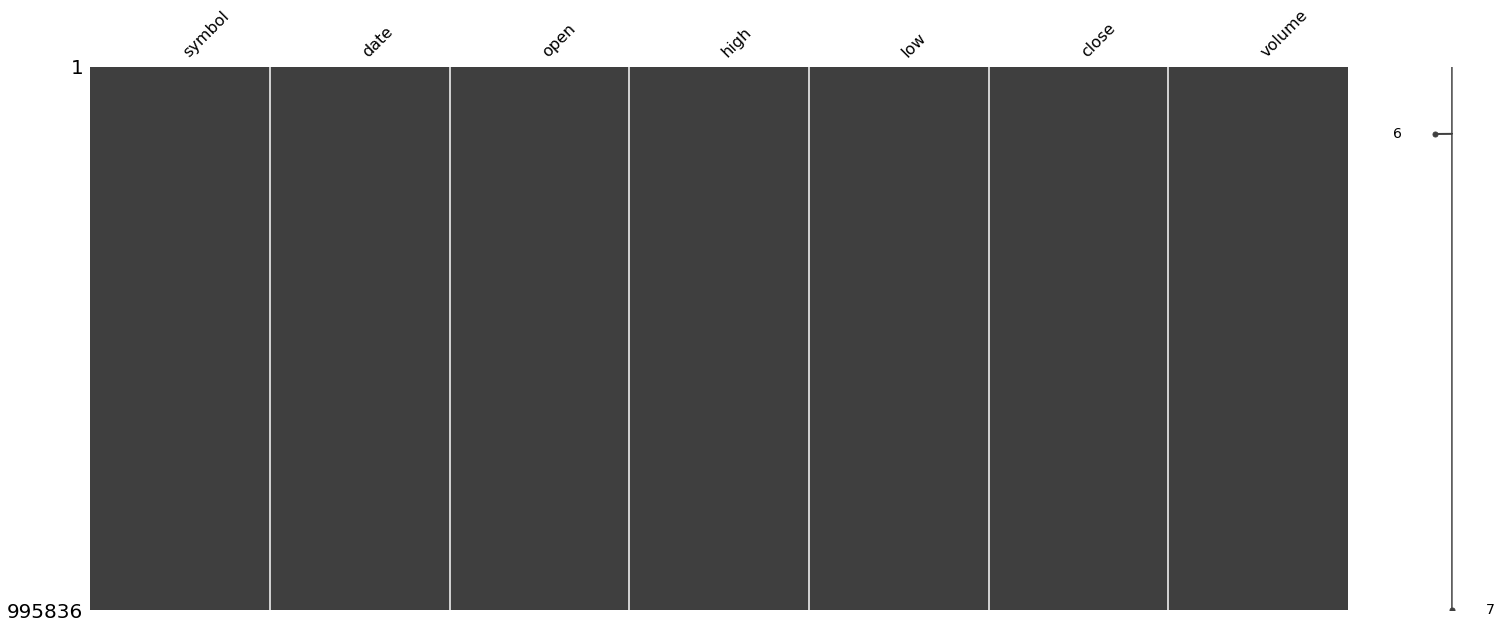

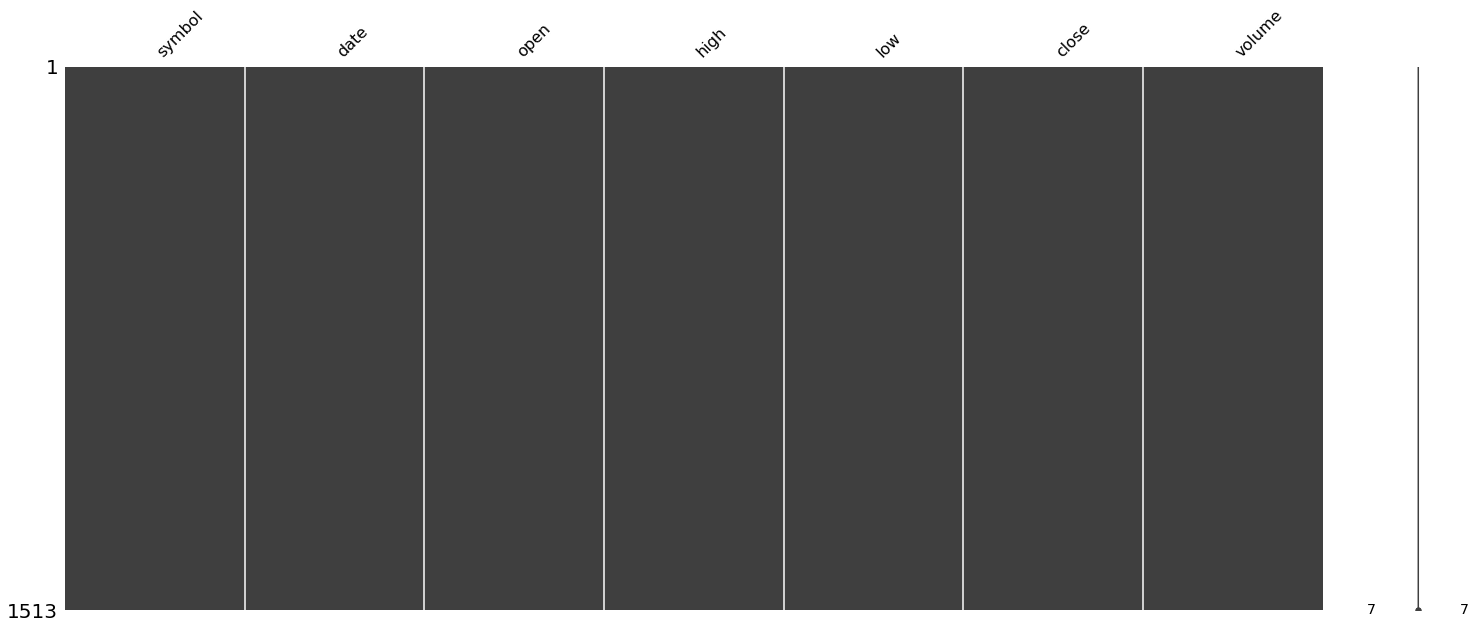

In [16]:
msno.matrix(df_all)
msno.matrix(df_dse30)

In [17]:
len(df_all['symbol'].unique())

494

In [18]:
df_all['symbol'].unique()

array(['00DS30', '00DSES', '00DSEX', '01.Bank', '02.Cement',
       '03.Ceramics_Sector', '04.Engineering',
       '05.Financial_Institutions', '06.Food_&_Allied', '07.Fuel_&_Power',
       '08.Insurance', '09.IT_Sector', '10.Jute', '11.Miscellaneous',
       '12.Mutual_Funds', '13.Paper_&_Printing',
       '14.Pharmaceuticals_&_Chemicals', '15.Services_&_Real_Estate',
       '16.Tannery_Industries', '17.Telecommunication', '18.Textile',
       '19.Travel_&_Leisure', '1JANATAMF', '1STPRIMFMF', '20.Bond',
       'AAMRANET', 'AAMRATECH', 'ABB1STMF', 'ABBANK', 'ACFL', 'ACI',
       'ACIFORMULA', 'ACMELAB', 'ACTIVEFINE', 'ADVENT', 'AFCAGRO',
       'AFTABAUTO', 'AGNISYSL', 'AGRANINS', 'AIBL1STIMF', 'AIL',
       'ALARABANK', 'AL-HAJTEX', 'ALIF', 'ALLTEX', 'AMANFEED', 'AMBEEPHA',
       'AMCL(PRAN)', 'ANLIMAYARN', 'ANWARGALV', 'APEXFOODS', 'APEXFOOT',
       'APEXSPINN', 'APEXTANRY', 'APOLOISPAT', 'ARAMIT', 'ARAMITCEM',
       'ARGONDENIM', 'ASIAINS', 'ASIAPACINS', 'ATCSLGF', 'ATLASBANG',
 

In [19]:
df = df_all['2008-01-01':'2008-01-03']

In [20]:
df.head()

,symbol,date,open,high,low,close,volume
date,,,,,,,
2008-01-01,00DSEGEN,01-01-2008,3044.00,3048.00,3005,3008.91,1.32037e+07
2008-01-02,00DSEGEN,02-01-2008,3007.00,3008.91,2956.67,2959.36,1.16743e+07
2008-01-03,00DSEGEN,03-01-2008,2960.50,2981.57,2929.31,2979.48,1.13184e+07
2008-01-01,1STBSRS,01-01-2008,620.25,628.00,615.25,619.00,0
2008-01-02,1STBSRS,02-01-2008,613.50,617.50,607,612.75,0


In [21]:
df_dse30.head()

,symbol,date,open,high,low,close,volume
date,,,,,,,
2008-01-01,00DSEGEN,01-01-2008,3044.00,3048.00,3005,3008.91,1.32037e+07
2008-01-02,00DSEGEN,02-01-2008,3007.00,3008.91,2956.67,2959.36,1.16743e+07
2008-01-03,00DSEGEN,03-01-2008,2960.50,2981.57,2929.31,2979.48,1.13184e+07
2008-01-06,00DSEGEN,06-01-2008,2976.89,2985.70,2928.33,2929.32,1.10248e+07
2008-01-07,00DSEGEN,07-01-2008,2928.00,2950.77,2921.84,2922.86,7.43962e+06


In [22]:
df_all['date'].unique()

array(['03-02-2019', '04-02-2019', '05-02-2019', ..., '26-06-2019',
       '27-06-2019', '30-06-2019'], dtype=object)

In [23]:
df_all = df_all.drop('date', axis=1)

In [24]:
df_all.head()

,symbol,open,high,low,close,volume
date,,,,,,
2019-02-03,00DS30,2007.96,2010.03,1996.52,2003.84,9.84212e+07
2019-02-04,00DS30,2003.84,2023.21,2003.84,2018.20,8.89052e+07
2019-02-05,00DS30,2018.20,2024.17,2010.43,2021.23,7.06664e+07
2019-02-06,00DS30,2021.23,2027.78,2014.37,2022.58,7.66848e+07
2019-02-07,00DS30,2022.58,2037.42,2022.05,2026.09,7.72978e+07


In [25]:
len(df_all['2015-01-01':'2015-12-31'].index.unique())


244

In [26]:
df_now = df_all[df_all['symbol'] == 'MTB']

In [27]:
df_now['2015-01-01':'2016-01-01']['close']

date
2015-01-01    20.1
2015-01-05    20.1
2015-01-06    20.5
2015-01-07    21.0
2015-01-08    20.4
              ... 
2015-12-27    19.3
2015-12-28    19.2
2015-12-29    19.2
2015-12-30    19.2
2015-12-31    19.5
Name: close, Length: 243, dtype: float64

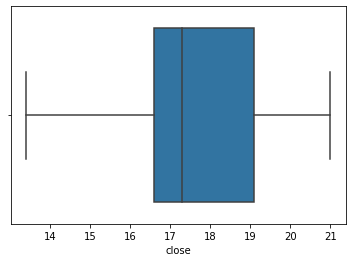

In [28]:
sns.boxplot(df_now['2015-01-01':'2016-01-01']['close'])

In [30]:
df_all.to_csv('../data/total_daily_data.csv')